In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 규제 선형 모델

다양한 선형회귀 규제 모델에 대해서 배웠습니다. 이제 코드로 각 모델을 학습시키는 방법을 알아보겠습니다. 

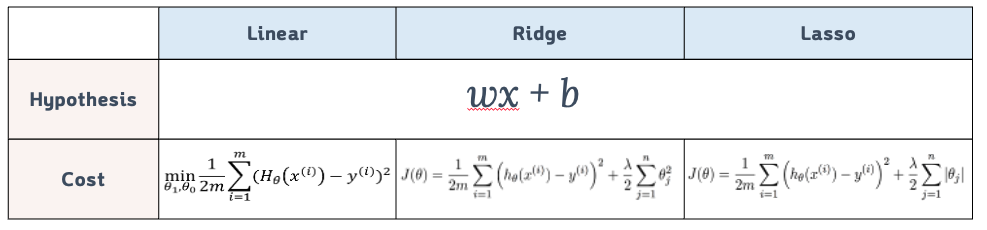

우선 선형 회귀 모델부터 복습하자면, 


In [2]:
# 데이터 생성
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

X.shape, y.shape

((100, 3), (100,))

In [3]:
# 모델 객체 생성
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [4]:
# 모델 학습
lin_reg.fit(X, y)

print(lin_reg.intercept_)
print(lin_reg.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


In [5]:
# 모델 평가
lin_reg.score(X, y)

1.0

### 데이터 불러오기

데이터는 지난 시간에 이미 살펴보았던 housing data를 그대로 불러오겠습니다. 

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

EDA와 데이터 전처리 또한 지난 시간과 동일하게 진행하겠습니다. 

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_data)

In [9]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리하세요
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### Linear Model  학습시키기

비교를 위해 단순 선형회귀모델을 학습시켜서 결과를 확인하겠습니다. 

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

회귀 계수를 확인해봅시다

In [11]:
lin_reg.coef_

array([ 0.85238169,  0.12238224, -0.30511591,  0.37113188, -0.00229841,
       -0.03662363, -0.89663505, -0.86892682])

In [12]:
lin_reg.coef_.max(), lin_reg.coef_.min(), np.mean(lin_reg.coef_)

(0.8523816881485069, -0.8966350465633477, -0.09546300105254849)

In [24]:
# 최대값의 인덱스는? 
lin_reg.coef_.argmax()
# np.where(lin_reg.coef_ == lin_reg.coef_.max())

0

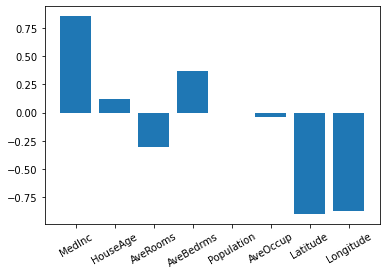

In [20]:
plt.bar(housing.feature_names, lin_reg.coef_)
plt.xticks(rotation=30)
plt.show()

## 비용 함수 목표 
: Min(RSS(W) + alpha * ||W||^2_2   --> 이전까지는 RSS를 최소화하는 것이 목적(회귀계수는 커짐)    


## Ridge
: 주요 생성 파라미터는 alpha / L2 규제 계수에 해당(회귀 계수의 크기 감소 시킴) 
- loss = MSE + alpha + L2

Ridge모델을 학습시켜봅시다. 

In [22]:
from sklearn.linear_model import Ridge

for a in [1, 10, 100, 1000, 10000]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    print('alpha = {}'.format(a))
    print(ridge.score(X_test, y_test))
    print(ridge.coef_.max(), ridge.coef_.min(), np.mean(ridge.coef_))

alpha = 1
0.575818534544132
0.8523100918563163 -0.8958845070087372 -0.09527899051339206
alpha = 10
0.5760870567061362
0.8516617057913276 -0.8891949731752754 -0.09364015332583298
alpha = 100
0.5779965419455848
0.8448775183827147 -0.8281542596579093 -0.07879322658259968
alpha = 1000
0.5681773973300766
0.7784432674232244 -0.5094404608386421 -0.005604231977041435
alpha = 10000
0.4477514631600443
0.4885959120287022 -0.13982835272659505 0.043969854731415396


In [23]:
ridge.coef_.argmax()

0

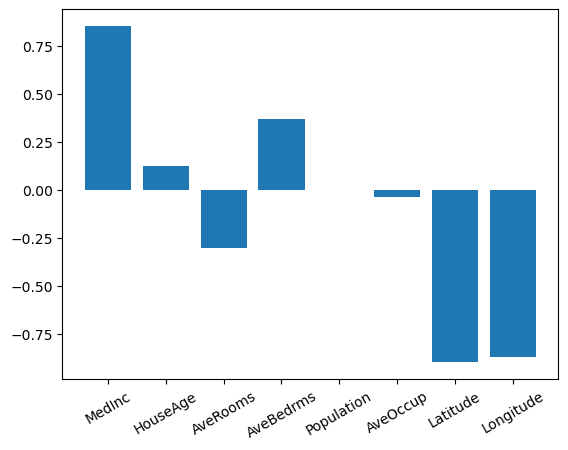

In [ ]:
plt.bar(housing.feature_names, ridge.coef_)
plt.xticks(rotation=30)
plt.show()

#### 연습
Ridge를 사용해서, 알파값을 각각 [0.0001, 0.1, 1, 10, 100, 10000]으로 해서 coef_의 값들을 시각화해보세요(barplot).    
이때, text로 r2_score도 함께 시각화해주세요.

alpha:0.0001
R2:0.5757877091253641


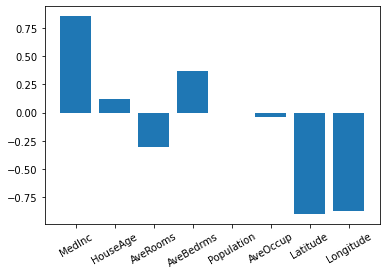

alpha:0.1
R2:0.5757907979394903


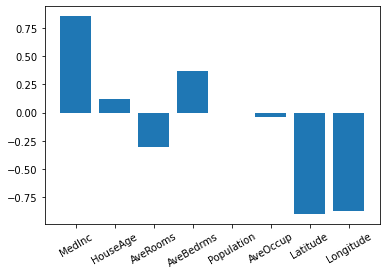

alpha:1
R2:0.575818534544132


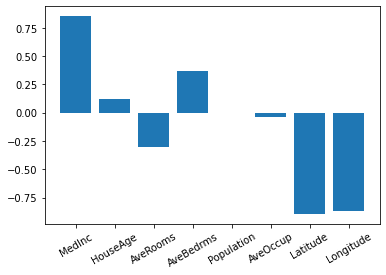

alpha:10
R2:0.5760870567061362


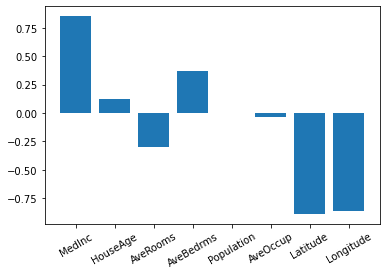

alpha:100
R2:0.5779965419455848


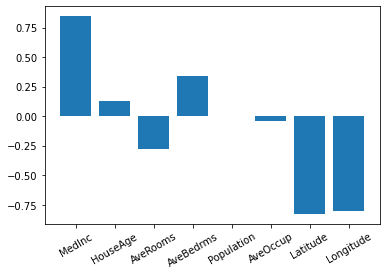

alpha:10000
R2:0.4477514631600443


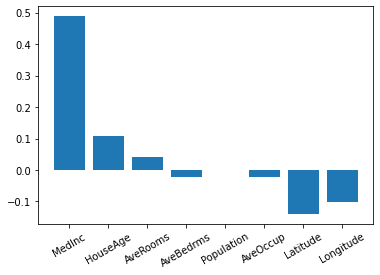

In [26]:
# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. (But, 0은 되지 않아요.)

ridge = None
alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]

for a in alpha_list:
    ridge = Ridge(alpha = a).fit(X_train, y_train)

    print('alpha:{}'.format(a))
    print('R2:{}'.format(ridge.score(X_test, y_test)))
    plt.bar(housing.feature_names, ridge.coef_)
    plt.xticks(rotation=30)
    plt.show()

## Lasso
: W의 절댓값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것
- loss = MSE + alpha * L1
- L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거(feature selection의 특성)

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso.coef_.max(), lasso.coef_.min(), np.mean(lasso.coef_)

(0.7091858667658841, -0.011479042198151528, 0.10052269488552608)

In [28]:
lasso.coef_.argmax()

0

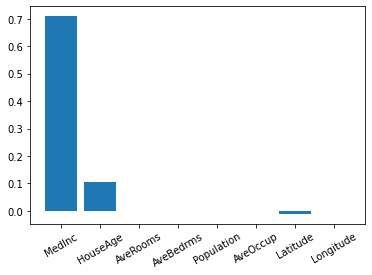

In [29]:
# feature selection의 특성
plt.bar(housing.feature_names, lasso.coef_)
plt.xticks(rotation=30)
plt.show()

### 연습
Lasso를 사용해서, 알파값을 각각 [0.0001, 0.1, 1, 10, 100, 10000]으로 해서 coef_의 값들을 시각화해보세요(barplot).
이때, text로 r2_score도 함께 시각화해주세요.

alpha : 0.0001
R2 : 0.5759


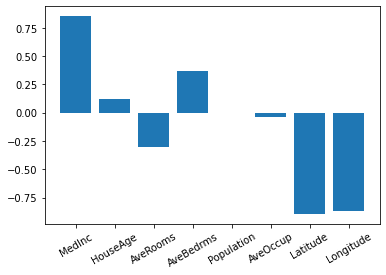

alpha : 0.1
R2 : 0.4814


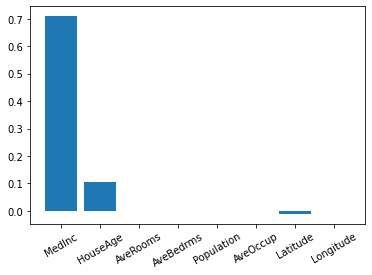

alpha : 1
R2 : -0.0002


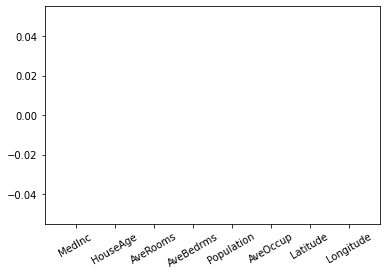

alpha : 10
R2 : -0.0002


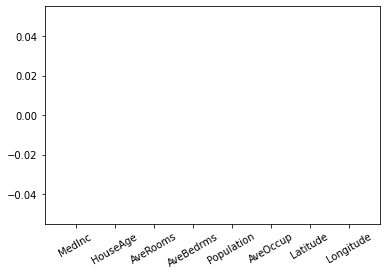

alpha : 100
R2 : -0.0002


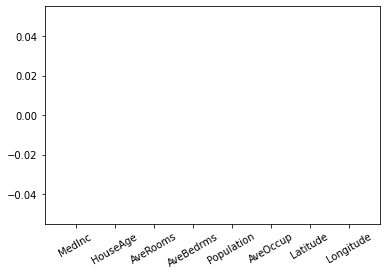

alpha : 10000
R2 : -0.0002


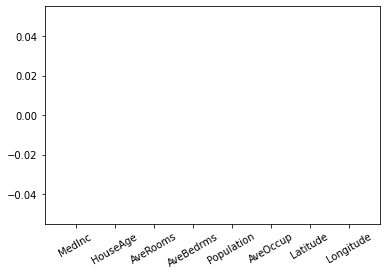

best score : 0.7091858667658841
alpha :  0.0001


In [38]:
# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. (But, 0은 되지 않아요.)

ridge = None
alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]

for a in alpha_list:
    ridge = Lasso(alpha = a).fit(X_train, y_train)

    print(f'alpha : {a}')
    print(f'R2 : {round(ridge.score(X_test, y_test), 4)}')

    plt.bar(housing.feature_names, ridge.coef_)
    plt.xticks(rotation=30)
    plt.show()

best_score = lasso.coef_.max()
print(f'best score : {best_score}')
lasso_best_params = {'alpha': alpha_list[ridge.coef_.argmax()]}
print('alpha : ', lasso_best_params['alpha'])


## Elastic Net
: L1규제와 L2규제를 결합한 회귀
- a * L1 + b * L2 (a는 L1규제의 alpha / b는 L2규제의 alpha)
- l1 ratio = a / (a+b)

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic.fit(X_train, y_train)
elastic

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [ ]:
elastic.score(X_train, y_train)

0.5499082184902451

In [ ]:
elastic.coef_

array([ 0.70860558,  0.14266817, -0.        ,  0.        ,  0.        ,
       -0.01273752, -0.29115426, -0.24859096])

### 연습. GridSearchCV를 사용하여 ElasticNet의 최적 하이퍼 파라미터를 찾아보세요. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV 
    
model = ElasticNet()

parametersGrid = {
                "alpha": [0.0001, 0.01, 1, 10, 100],
                "l1_ratio": np.arange(0.0, 1.2, 0.2)}

grid_els = GridSearchCV(model, param_grid = parametersGrid, cv=3, refit = True ,  scoring='r2')

# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환 

grid_els.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.01, 1, 10, 100],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             scoring='r2')

In [ ]:
pd.DataFrame(grid_els.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'l1_ratio': 0.0}",0.611093,6,0.612692,0.617243,0.603343
1,"{'alpha': 0.0001, 'l1_ratio': 0.2}",0.611096,5,0.612692,0.617247,0.603348
2,"{'alpha': 0.0001, 'l1_ratio': 0.4}",0.611099,4,0.612692,0.617252,0.603354
3,"{'alpha': 0.0001, 'l1_ratio': 0.6000000000000001}",0.611102,3,0.612692,0.617255,0.603359
4,"{'alpha': 0.0001, 'l1_ratio': 0.8}",0.611105,2,0.612692,0.617259,0.603365
5,"{'alpha': 0.0001, 'l1_ratio': 1.0}",0.611108,1,0.612692,0.617262,0.603370
6,"{'alpha': 0.01, 'l1_ratio': 0.0}",0.609668,7,0.611266,0.614511,0.603227
7,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.609618,8,0.610994,0.614489,0.603371
8,"{'alpha': 0.01, 'l1_ratio': 0.4}",0.609380,9,0.610612,0.614098,0.603430
9,"{'alpha': 0.01, 'l1_ratio': 0.6000000000000001}",0.608955,10,0.610125,0.613359,0.603382


최적의 파라미터는 무엇이었나요? 

{'alpha': 0.0001, 'l1_ratio': 1.0}

회귀 계수를 시각화해보세요. 

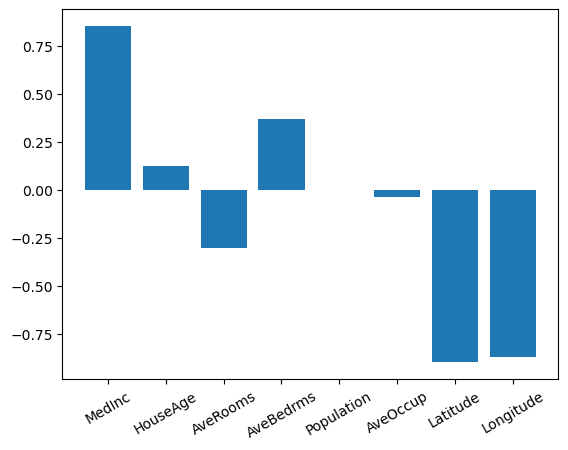

모델의 성능을 확인해보세요

In [ ]:
# r2 score

0.5759064004198498

In [ ]:
# mse 

0.7454770690667352

## 실습 - Insurance Prediction

의료보험 데이터를 활용해 한 사람이 보험료를 얼마나 낼지를 예측하는 회귀 문제를 다뤄보겠습니다.데이터를 이루고 있는 column들에 대한 설명은 다음과 같습니다.

- Age: 피보험자의 나이
- Sex: 피보험자의 성별
- BMI: 피보험자의 체질량 지수 -  $weight(kg) / height(m)^2$
- Children: 피보험자의 자녀의 수
- Smoker: 흡연 여부 (yes / no)
- Region: 피보험자가 거주하는 지역 (Southeast / Southwest / Northeast / Northwest)
- Charges: 보험료

In [ ]:
# !pip install gdown

In [ ]:
!gdown --id 1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_

/Users/esoyeon/miniforge3/envs/env_sl/lib/python3.9/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_
To: /Users/esoyeon/projects/_lecture/03_machine_learning/실습/insurance.csv
100%|██████████████████████████████████████| 55.6k/55.6k [00:00<00:00, 3.29MB/s]


In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("insurance.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

### EDA

In [ ]:
# 데이터 타입 및 데이터 개수 확인 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [ ]:
# 타깃 데이터 확인


,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300
...,...,...
44,44,6079.67150
621,621,40182.24600
1152,1152,40941.28540
57,57,34303.16720


<AxesSubplot: >

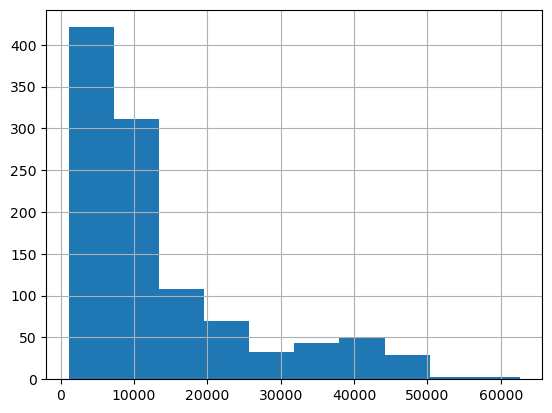

In [ ]:
# 타깃 데이터 분포 확인


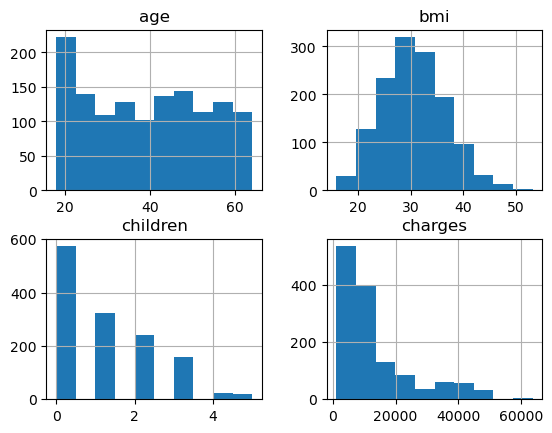

In [ ]:
# 데이터 분포 확인 - 수치형

In [ ]:
# 데이터 분포 확인 - 카테고리형



===== sex =====
male      676
female    662
Name: sex, dtype: int64

===== smoker =====
no     1064
yes     274
Name: smoker, dtype: int64

===== region =====
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### 데이터 전처리 

데이터 전처리가 필요하다면 진행하세요

In [ ]:
# 결측치

In [ ]:
# 데이터 타입 변환

In [ ]:
# 인코딩

In [ ]:
# 스케일링

### 모델링

In [ ]:
# Train-Validation Split 
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split()


In [ ]:
# 다양한 선형회귀 모델을 시도해보세요


In [ ]:
# 모델 성능 확인